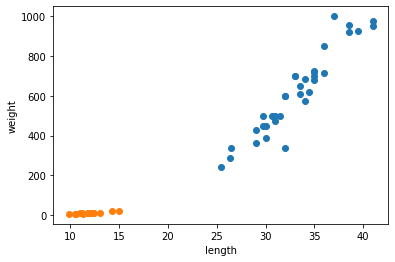

In [1]:
#k-nearest neighbors algorithm
import matplotlib.pyplot as plt
import numpy as np

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

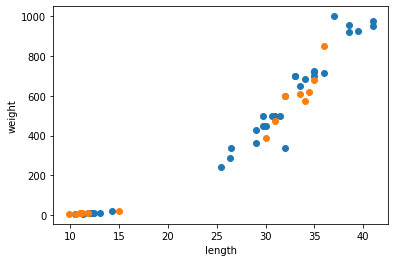

In [2]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1]*35 + [0]*14

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

#훈련세트
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

#테스트세트
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
def CF_predict(data, k=5):

  #각 점과, data와의 거리 계산
  nn = []
  for i in range(len(train_input)):
    length = (data[0]-train_input[i][0])**2 + (data[1]-train_input[i][1])**2
    nn.append((length,train_target[i]))

  #거리 순으로 정렬
  nn = sorted(nn,key = lambda x:x[0])

  #가장 가까운 k개의 점에 대해, 가중치(1/(거리))를 각 라벨 별로 더함
  #거리가 0일 경우 0.01로 계산하여 100의 가중치를 더함
  target = [0]*2
  for i in range(k):
    if nn[i][0] == 0:
      target[nn[i][1]] += 100
    else:
      target[nn[i][1]] += 1/nn[i][0]
  
  #가장 높은 가중치를 받은 라벨을 리턴
  result = target.index(max(target))
  return result

def CF_score(data_set,answer_set,k=5):
  count = 0
  n = len(data_set)
  #각 data에 대해, 결과와 정답이 일치하는지 체크
  for i in range(n):
    if CF_predict(data_set[i],k) == answer_set[i]:
      count += 1
  
  #정답의 비율을 리턴
  result = count/n
  return result


In [4]:
a = CF_score(test_input,test_target)
print(a)



1.0


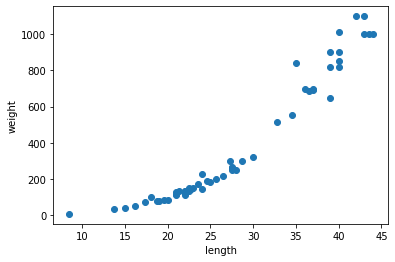

'train_input = train_input.reshape(-1, 1)\ntest_input = test_input.reshape(-1, 1)'

In [5]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

#열 벡터로 변경
'''train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)'''

In [11]:
def RG_predict(data,k=5):
  n = len(train_input)
  
  nn = []
  #data와의 길이 차이를 인덱스와 함께 저장
  for i in range(n):
    nn.append([abs(data-train_input[i]),i])
  
  #거리 순으로 정렬
  nn = sorted(nn,key = lambda x:x[0])

  #가장 가까운 k개의 점에 대해, 각 점의 무게에 대한 평균치를 구함
  w = 0
  for i in range(k):
    w += train_target[nn[i][1]]
  result = round(w/k,2)

  return result

def RG_score(data_set,answer_set,k=5):
  
  n = len(data_set)
  mean = np.mean(answer_set)

  SSR = 0 #(타깃 - 예측)**2 합
  SST = 0 #(타깃 - 평균)**2 합

  for i in range(n):
    w = RG_predict(data_set[i],k) #예측한 무게
    SSR += (answer_set[i]-w)**2
    SST += (answer_set[i]-mean)**2

  R2 = 1 - (SSR/SST)
  return R2

In [12]:
print(RG_score(test_input,test_target,k=3))

0.9746455152628792
